In [57]:
import pandas as pd

wine_df = pd.read_csv('./csv/wine.csv', encoding='CP949')

wine_df

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0
1,9.8,2.6,3.20,0
2,9.8,2.3,3.26,0
3,9.8,1.9,3.16,0
4,9.4,1.9,3.51,0
...,...,...,...,...
6492,11.2,1.6,3.27,1
6493,9.6,8.0,3.15,1
6494,9.4,1.2,2.99,1
6495,12.8,1.1,3.34,1


In [82]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   도수      6497 non-null   float64
 1   당도      6497 non-null   float64
 2   산도      6497 non-null   float64
 3   타겟      6497 non-null   int64  
dtypes: float64(3), int64(1)
memory usage: 203.2 KB


In [83]:
wine_df.describe()

,도수,당도,산도,타겟
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501,0.753886
std,1.192712,4.757804,0.160787,0.430779
min,8.000000,0.600000,2.720000,0.000000
25%,9.500000,1.800000,3.110000,1.000000
50%,10.300000,3.000000,3.210000,1.000000
75%,11.300000,8.100000,3.320000,1.000000
max,14.900000,65.800000,4.010000,1.000000


In [84]:
wine_df.isna().sum()

도수    0
당도    0
산도    0
타겟    0
dtype: int64

In [85]:
# 컬럼명 확인
wine_df.columns

Index(['도수', '당도', '산도', '타겟'], dtype='object')

In [86]:
# 컬럼명 변경
wine_df.rename(columns={
    'alcohol' : '도수', 
    'sugar' : '당도', 
    'pH' : '산도',
    'class' : '타겟'}, inplace=True)

wine_df.columns

Index(['도수', '당도', '산도', '타겟'], dtype='object')

### 피처와 레이블

In [87]:
# 레이블이 0 이면 레드 와인
# 레이블이 1 이면 화이트 와인
data = wine_df[['도수', '당도', '산도']]
target = wine_df['타겟']

print(data)
print(target)
print(target.value_counts())

        도수   당도    산도
0      9.4  1.9  3.51
1      9.8  2.6  3.20
2      9.8  2.3  3.26
3      9.8  1.9  3.16
4      9.4  1.9  3.51
...    ...  ...   ...
6492  11.2  1.6  3.27
6493   9.6  8.0  3.15
6494   9.4  1.2  2.99
6495  12.8  1.1  3.34
6496  11.8  0.8  3.26

[6497 rows x 3 columns]
0       0
1       0
2       0
3       0
4       0
       ..
6492    1
6493    1
6494    1
6495    1
6496    1
Name: 타겟, Length: 6497, dtype: int64
1    4898
0    1599
Name: 타겟, dtype: int64


### 데이터 분리

In [88]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.3, random_state=42)

In [89]:
# 데이터를 분리한 후에 출력을 하고, 인덱스가 잘 섞였나 확인.
print('X 테스트 데이터 : ')
print(X_test)
print('y 테스트 데이터 : ')
print(list(y_test))

X 테스트 데이터 : 
        도수     당도    산도
3103  12.2  12.80  3.26
1419   9.9   2.20  3.27
4761  12.0   7.40  3.18
4690   9.5  11.20  3.12
4032   8.9  13.90  3.11
...    ...    ...   ...
4294  11.3   9.65  3.28
3757  10.6   1.30  3.52
5954  12.7   2.50  3.22
4418  11.4   2.00  3.44
6182   9.3   7.90  2.86

[1950 rows x 3 columns]
y 테스트 데이터 : 
[1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 

In [90]:
# 피처, 레이블 데이터 분포 비율

train_cnt = y_train.count()
test_cnt = y_test.count()
print('학습 세트 Shape:{0}, 테스트 세트 Shape:{1}'.format(X_train.shape, X_test.shape))

print('학습 세트 레이블 값 분포 비율')
print(y_train.value_counts()/train_cnt)
print('\n 테스트 세트 레이블 값 분포 비율')
print(y_test.value_counts()/train_cnt)

학습 세트 Shape:(4547, 3), 테스트 세트 Shape:(1950, 3)
학습 세트 레이블 값 분포 비율
1    0.758742
0    0.241258
Name: 타겟, dtype: float64

 테스트 세트 레이블 값 분포 비율
1    0.318452
0    0.110402
Name: 타겟, dtype: float64


### 머신러닝 분류 모델

In [91]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import lightgbm
from lightgbm import LGBMClassifier
# from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, confusion_matrix, recall_score, precision_score


import numpy as np
import time
import warnings
warnings.filterwarnings('ignore')

lr_clf = LogisticRegression()
dt_clf = DecisionTreeClassifier(random_state=42)
rf_clf = RandomForestClassifier(random_state=42, n_jobs=-1)
gb_clf = GradientBoostingClassifier(random_state=42)
lgb_clf = LGBMClassifier(random_state=42)
# xgb_wrapper = XGBClassifier(n_estimators=300, learning_rate=0.1, max_depth=3)
knn_clf = KNeighborsClassifier()
gnb_clf = GaussianNB()

### 모델별 학습/예측/평가

In [92]:
# LogisticRegression 학습/예측/평가
lr_clf_time = time.time()
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)

print('LogisticRegression 정확도: {0:.4f}'.format(accuracy_score(y_test, lr_pred)))
print('LogisticRegression roc_auc: {:0.3f}'.format(roc_auc_score(y_test, lr_pred)))
print('LogisticRegression 수행 시간: {0:.1f} 초'.format(time.time()-lr_clf_time))

# DecisionTreeClassifier 학습/예측/평가
dt_clf_time = time.time()
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)

print('\nDecisionTreeClassifier 정확도: {0:.4f}'.format(accuracy_score(y_test, dt_pred)))
print('DecisionTreeClassifier roc_auc: {:0.3f}'.format(roc_auc_score(y_test, dt_pred)))
print('DecisionTree 수행 시간: {0:.1f} 초'.format(time.time()-dt_clf_time))

# RandomForestClassifier 학습/예측/평가
rf_clf_time = time.time()
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)

print('\nRandomForestClassifier 정확도: {0:.4f}'.format(accuracy_score(y_test, rf_pred)))
print('RandomForestClassifier roc_auc: {:0.3f}'.format(roc_auc_score(y_test, rf_pred)))
print('RandomForest 수행 시간: {0:.1f} 초'.format(time.time()-rf_clf_time))

# GBM 학습/예측/평가
gb_clf_time = time.time()
gb_clf.fit(X_train, y_train)
gb_pred = gb_clf.predict(X_test)

print('\nGBM 정확도: {0:.4f}'.format(accuracy_score(y_test, gb_pred)))
print('GBM roc_auc: {:0.3f}'.format(roc_auc_score(y_test, gb_pred)))
print('GBM 수행 시간: {0:.1f} 초'.format(time.time()-gb_clf_time))

# LGBM 학습/예측/평가
lgb_clf_time = time.time()
lgb_clf.fit(X_train, y_train)
lgb_pred = lgb_clf.predict(X_test)

print('\nLGBM 정확도: {0:.4f}'.format(accuracy_score(y_test, lgb_pred)))
print('LGBM roc_auc: {:0.3f}'.format(roc_auc_score(y_test, lgb_pred)))
print('LGBM 수행 시간: {0:.1f} 초'.format(time.time()-lgb_clf_time))

# XGBClassifier 학습/예측/평가
# xgb_wrapper_time = time.time()
# xgb_wrapper.fit(X_train, y_train)
# xgb_pred = xgb_wrapper.predict(X_test)

# print('\nXGBC 정확도: {0:.4f}'.format(accuracy_score(y_test, xgb_pred)))
# print('XGBC roc_auc: {:0.3f}'.format(roc_auc_score(y_test, xgb_pred)))
# print('XGBC 수행 시간: {0:.1f} 초'.format(time.time()-xgb_wrapper_time))

# KNN 학습/예측/평가
knn_clf_time = time.time()
knn_clf.fit(X_train, y_train)
knn_pred = knn_clf.predict(X_test)

print('\nKNN 정확도: {0:.4f}'.format(accuracy_score(y_test, knn_pred)))
print('KNN roc_auc: {:0.3f}'.format(roc_auc_score(y_test, knn_pred)))
print('KNN 수행 시간: {0:.1f} 초'.format(time.time()-knn_clf_time))

# GNB 학습/예측/평가
gnb_clf_time = time.time()
gnb_clf.fit(X_train, y_train)
gnb_pred = gnb_clf.predict(X_test)

print('\nGNB 정확도: {0:.4f}'.format(accuracy_score(y_test, gnb_pred)))
print('GNB roc_auc: {:0.3f}'.format(roc_auc_score(y_test, gnb_pred)))
print('GNB 수행 시간: {0:.1f} 초'.format(time.time()-gnb_clf_time))

LogisticRegression 정확도: 0.7723
LogisticRegression roc_auc: 0.635
LogisticRegression 수행 시간: 0.0 초

DecisionTreeClassifier 정확도: 0.8600
DecisionTreeClassifier roc_auc: 0.819
DecisionTree 수행 시간: 0.0 초

RandomForestClassifier 정확도: 0.8851
RandomForestClassifier roc_auc: 0.851
RandomForest 수행 시간: 0.2 초

GBM 정확도: 0.8564
GBM roc_auc: 0.808
GBM 수행 시간: 0.3 초

LGBM 정확도: 0.8626
LGBM roc_auc: 0.829
LGBM 수행 시간: 0.1 초

KNN 정확도: 0.8549
KNN roc_auc: 0.806
KNN 수행 시간: 0.1 초

GNB 정확도: 0.7815
GNB roc_auc: 0.779
GNB 수행 시간: 0.0 초


## 검증 데이터 분리 및 최적 하이퍼 파라미터 탐색

### KFold

In [69]:
from sklearn.model_selection import KFold
import numpy as np

def exec_kfold(clf, folds=5):
    # 폴드 세트를 5개인 KFold객체 생성
    kfold = KFold(n_splits=folds)
    scores = []
    
    # KFold 교차 검증
    for iter_count, (train_index, test_index) in enumerate(kfold.split(data)):
        X_train, X_test = data.values[train_index], data.values[test_index]
        y_train, y_test = target.values[train_index], target.values[test_index]
        
        clf.fit(X_train, y_train)
        predictions = clf.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        scores.append(accuracy)
        print("교차 검증 {0} 정확도: {1:.4f}".format(iter_count, accuracy))
        
    mean_score = np.mean(scores)
    print("평균 정확도: {0:.4f}".format(mean_score))

In [70]:
# Logisticregression KFold
exec_kfold(lr_clf, folds=5)

교차 검증 0 정확도: 0.0062
교차 검증 1 정확도: 0.7900
교차 검증 2 정확도: 0.8022
교차 검증 3 정확도: 0.8938
교차 검증 4 정확도: 0.9338
평균 정확도: 0.6852


In [71]:
# DecisionTree KFold
exec_kfold(dt_clf, folds=5)

교차 검증 0 정확도: 0.2608
교차 검증 1 정확도: 0.8077
교차 검증 2 정확도: 0.8283
교차 검증 3 정확도: 0.8368
교차 검증 4 정확도: 0.8830
평균 정확도: 0.7233


In [72]:
# RandomForest KFold
exec_kfold(rf_clf, folds=5)

교차 검증 0 정확도: 0.2492
교차 검증 1 정확도: 0.8546
교차 검증 2 정확도: 0.8737
교차 검증 3 정확도: 0.8999
교차 검증 4 정확도: 0.9230
평균 정확도: 0.7601


In [73]:
# GBM KFold
exec_kfold(gb_clf, folds=5)

교차 검증 0 정확도: 0.3085
교차 검증 1 정확도: 0.8431
교차 검증 2 정확도: 0.8838
교차 검증 3 정확도: 0.9061
교차 검증 4 정확도: 0.9215
평균 정확도: 0.7726


In [74]:
# XGBC KFold
# exec_kfold(xgb_wrapper, folds=5)

In [75]:
from sklearn.model_selection import KFold

kfold = KFold(n_splits=5)
n_iter=0
cv_accuracy=[]

# 학습 데이터세트의 인덱스는 수가 많아서 생략
for train_index, test_index in kfold.split(data, target):
    n_iter += 1
    
    # 학습 및 검증 레이블 데이터 분포
    label_train = target.iloc[train_index]
    label_test = target.iloc[test_index]
    print('학습 레이블 데이터 분포:\n', label_train.value_counts())
    print('검증 레이블 데이터 분포:\n', label_test.value_counts())

학습 레이블 데이터 분포:
 1    4898
0     299
Name: 타겟, dtype: int64
검증 레이블 데이터 분포:
 0    1300
Name: 타겟, dtype: int64
학습 레이블 데이터 분포:
 1    3897
0    1300
Name: 타겟, dtype: int64
검증 레이블 데이터 분포:
 1    1001
0     299
Name: 타겟, dtype: int64
학습 레이블 데이터 분포:
 1    3599
0    1599
Name: 타겟, dtype: int64
검증 레이블 데이터 분포:
 1    1299
Name: 타겟, dtype: int64
학습 레이블 데이터 분포:
 1    3599
0    1599
Name: 타겟, dtype: int64
검증 레이블 데이터 분포:
 1    1299
Name: 타겟, dtype: int64
학습 레이블 데이터 분포:
 1    3599
0    1599
Name: 타겟, dtype: int64
검증 레이블 데이터 분포:
 1    1299
Name: 타겟, dtype: int64


In [76]:
# DecisionTree KFold
cv_accuracy = []
kfold=KFold(n_splits=5)
n_iter = 0

# 학습 데이터세트의 인덱스는 수가 많아서 생략
for train_index, test_index in kfold.split(data):
    X_train, X_test = data.iloc[train_index], data.iloc[test_index]
    y_train, y_test = target.iloc[train_index], target.iloc[test_index]
    
    # DecisionTree 학습 및 예측
    dt_clf.fit(X_train, y_train)
    pred = dt_clf.predict(X_test)
    n_iter += 1
    
    # 정확도 예측
    accuracy = np.round(accuracy_score(y_test, pred), 4)
    train_size = X_train.shape[0]
    test_size = X_test.shape[0]
    print('\n#{0} 교차 검증 정확도 :{1}, 학습 데이터 크기: {2}, 검증데이터 크기: {3}'.format(n_iter, accuracy, train_size, test_size))
    print('#{0} 검증 세트 인덱스:{1}'.format(n_iter, test_index))
    
    # 학습 및 검증 레이블 데이터 분포
    label_train = target.iloc[train_index]
    label_test = target.iloc[test_index]
    print('학습 레이블 데이터 분포:\n', label_train.value_counts())
    print('검증 레이블 데이터 분포:\n', label_test.value_counts())
    cv_accuracy.append(accuracy)
    
print('\n## 평균 검증 정확도:', np.mean(cv_accuracy))


#1 교차 검증 정확도 :0.2608, 학습 데이터 크기: 5197, 검증데이터 크기: 1300
#1 검증 세트 인덱스:[   0    1    2 ... 1297 1298 1299]
학습 레이블 데이터 분포:
 1    4898
0     299
Name: 타겟, dtype: int64
검증 레이블 데이터 분포:
 0    1300
Name: 타겟, dtype: int64

#2 교차 검증 정확도 :0.8077, 학습 데이터 크기: 5197, 검증데이터 크기: 1300
#2 검증 세트 인덱스:[1300 1301 1302 ... 2597 2598 2599]
학습 레이블 데이터 분포:
 1    3897
0    1300
Name: 타겟, dtype: int64
검증 레이블 데이터 분포:
 1    1001
0     299
Name: 타겟, dtype: int64

#3 교차 검증 정확도 :0.8283, 학습 데이터 크기: 5198, 검증데이터 크기: 1299
#3 검증 세트 인덱스:[2600 2601 2602 ... 3896 3897 3898]
학습 레이블 데이터 분포:
 1    3599
0    1599
Name: 타겟, dtype: int64
검증 레이블 데이터 분포:
 1    1299
Name: 타겟, dtype: int64

#4 교차 검증 정확도 :0.8368, 학습 데이터 크기: 5198, 검증데이터 크기: 1299
#4 검증 세트 인덱스:[3899 3900 3901 ... 5195 5196 5197]
학습 레이블 데이터 분포:
 1    3599
0    1599
Name: 타겟, dtype: int64
검증 레이블 데이터 분포:
 1    1299
Name: 타겟, dtype: int64

#5 교차 검증 정확도 :0.883, 학습 데이터 크기: 5198, 검증데이터 크기: 1299
#5 검증 세트 인덱스:[5198 5199 5200 ... 6494 6495 6496]
학습 레이블 데이터 분포:
 1    3599
0    1599
Nam

### GridSearch CV

In [93]:
from sklearn.model_selection import GridSearchCV

parameters = {
                'max_depth':[3, 4, 5, 6],\
                'min_samples_leaf':[2, 4, 6],\
                'min_samples_split':[2, 4, 6]
            }

start_time = time.time()
b_params = []

grid_cv = GridSearchCV(dt_clf, param_grid=parameters, scoring='accuracy', cv=5)
grid_cv.fit(X_train, y_train)

b_params.append(grid_cv.best_params_)

print('GridSearchCV 최적 하이퍼 파라미터 :', grid_cv.best_params_)
print('\nGridSearchCV 최고 정확도 : {0:.4f}'.format(grid_cv.best_score_))
best_est = grid_cv.best_estimator_

predictions = best_est.predict(X_test)
accuracy = accuracy_score(y_test, predictions)

print('테스트 세트에서의 DecisionTreeClassifier 정확도 : {0:.4f}'.format(accuracy))
print('DecisionTreeClassifier GridSearchCV 수행 시간: {0:.1f} 초'.format(time.time()-start_time))

GridSearchCV 최적 하이퍼 파라미터 : {'max_depth': 6, 'min_samples_leaf': 4, 'min_samples_split': 2}

GridSearchCV 최고 정확도 : 0.8601
테스트 세트에서의 DecisionTreeClassifier 정확도 : 0.8533
DecisionTreeClassifier GridSearchCV 수행 시간: 1.2 초


In [94]:
# 최적 하이퍼 파라미터 적용
dt_clf1 = DecisionTreeClassifier(max_depth=6, min_samples_leaf=4, min_samples_split=2)
dt_clf1.fit(X_train, y_train)
dt1_pred = dt_clf1.predict(X_test)
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test, dt1_pred)))

예측 정확도: 0.8533


### ROC_AUC

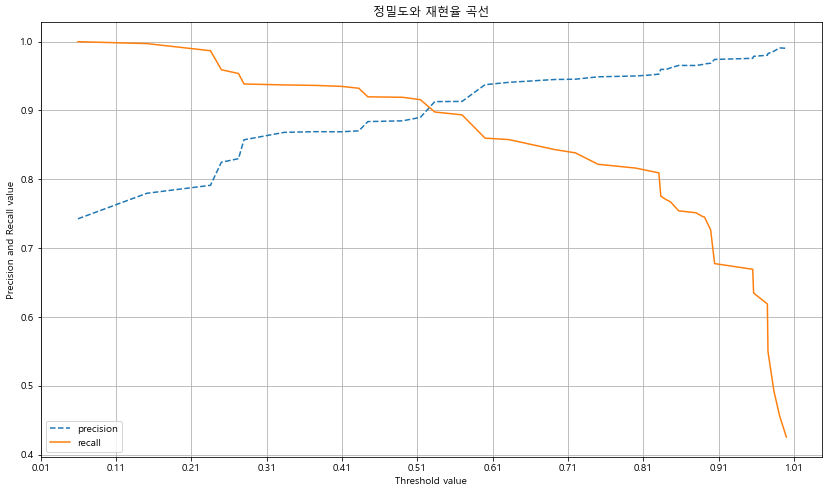

In [95]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['axes.unicode_minus'] = False
plt.rcParams["font.family"] = "Malgun Gothic"

precisions, recalls, thresholds = precision_recall_curve(y_test, dt_clf1.predict_proba(X_test)[:, 1])

# X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 plot 수행. 정밀도는 점선으로 표시
plt.figure(figsize=(14, 8))
# 임곗값 수치    
threshold_boundary = thresholds.shape[0]
# 정밀도는 점선으로
plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
# 재현율은 선으로
plt.plot(thresholds, recalls[0:threshold_boundary], label='recall')

start, end = plt.xlim()
# x축을 0.1씩 증가, 소수점 둘째자리까지 표시
plt.xticks(np.round(np.arange(start, end, 0.1), 2))

plt.title("정밀도와 재현율 곡선")
plt.xlabel('Threshold value')
plt.ylabel('Precision and Recall value')
plt.legend()
plt.grid()
plt.show()

- 임계값이 낮을수록 재현율은 높고, 정밀도는 낮다.
- 임계값이 클수록 재현율은 낮고, 정밀도는 높다.

In [96]:
from sklearn.metrics import roc_curve

# 레이블 값이 1일때의 예측 확률
pred_proba_class1 = dt_clf1.predict_proba(X_test)[:, 1]

fprs, tprs, thresholds = roc_curve(y_test, pred_proba_class1)

# thresholds[0]은 max(예측확률)+1로 임의 설정. 이를 제외하기 위해 np.arange는 1부터 시작
thr_index = np.arange(1, thresholds.shape[0])

print('샘플 추출을 위한 임곗값 배열의 index:', thr_index)
print('샘플 index로 추출한 임곗값: ', np.round(thresholds[thr_index], 2))

print('샘플 임곗값별 FPR: ', np.round(fprs[thr_index], 3))
print('샘플 임곗값별 TPR: ', np.round(tprs[thr_index], 3))

샘플 추출을 위한 임곗값 배열의 index: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
샘플 index로 추출한 임곗값:  [1.   0.99 0.98 0.98 0.97 0.96 0.96 0.9  0.9  0.89 0.89 0.88 0.86 0.85
 0.84 0.83 0.83 0.82 0.8  0.75 0.72 0.69 0.63 0.6  0.57 0.53 0.51 0.49
 0.44 0.43 0.41 0.38 0.33 0.28 0.27 0.25 0.24 0.15 0.06]
샘플 임곗값별 FPR:  [0.012 0.012 0.02  0.028 0.036 0.04  0.048 0.052 0.068 0.072 0.074 0.078
 0.078 0.088 0.094 0.094 0.116 0.12  0.124 0.127 0.139 0.141 0.155 0.165
 0.245 0.247 0.327 0.345 0.349 0.4   0.406 0.406 0.41  0.45  0.564 0.588
 0.751 0.813 1.   ]
샘플 임곗값별 TPR:  [0.425 0.456 0.492 0.55  0.619 0.635 0.669 0.677 0.727 0.745 0.746 0.751
 0.754 0.767 0.771 0.776 0.809 0.812 0.816 0.822 0.838 0.843 0.858 0.86
 0.894 0.898 0.916 0.919 0.92  0.932 0.935 0.936 0.937 0.939 0.954 0.959
 0.987 0.997 1.   ]


In [97]:
from sklearn.metrics import roc_auc_score

pred_proba = dt_clf1.predict_proba(X_test)[:, 1]
roc_score = roc_auc_score(y_test, pred_proba)
print('AUC 값: {0:.4f}'.format(roc_score))

AUC 값: 0.9115


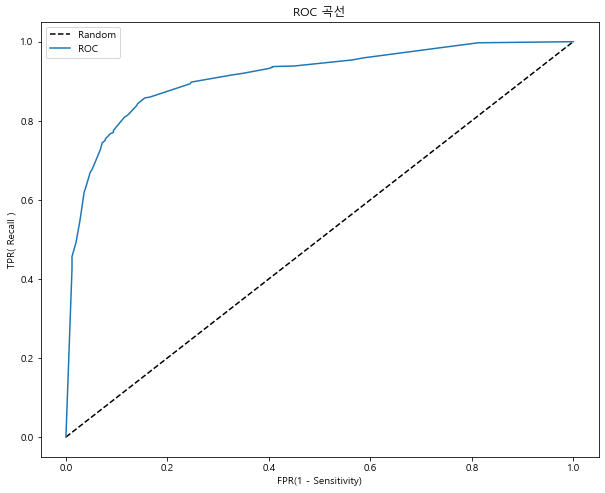

In [98]:
plt.figure(figsize=(10,8))

plt.title("ROC 곡선")
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.plot(fprs, tprs, label="ROC")
plt.xlabel('FPR(1 - Sensitivity)')
plt.ylabel('TPR( Recall )')
plt.legend()
# plt.fill_between(fprs, tprs, color='y', alpha=0.3)
# plt.annotate('AUC : {0:.4f}'.format(roc_score), xy=(0.6, 0.2),ha='center', va='baseline', fontsize=15)
plt.show()

In [102]:
confusion = confusion_matrix(y_test, dt1_pred)
accuracy = accuracy_score(y_test, dt1_pred)
precision = precision_score(y_test, dt1_pred)
recall = recall_score(y_test, dt1_pred)
f1 = f1_score(y_test, dt1_pred)
roc_auc = roc_auc_score(y_test, pred_proba)

print('오차행렬')
print(confusion)
print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1:{3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

오차행렬
[[ 338  164]
 [ 122 1326]]
정확도: 0.8533, 정밀도: 0.8899, 재현율: 0.9157, F1:0.9027, AUC:0.9115


In [103]:
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1:{3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))
    
    return accuracy, precision, recall, f1, roc_auc

In [104]:
from sklearn.preprocessing import Binarizer

# 임곗값별 수치 함수 재설정
def get_eval_by_threshold(y_test, pred_proba_c1, thresholds):
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1)
        custom_predict = binarizer.transform(pred_proba_c1)
        print('임곗값:', custom_threshold)
        get_clf_eval(y_test, custom_predict, dt_clf1.predict_proba(X_test)[:, 1])

In [105]:
from sklearn.preprocessing import Binarizer

thresholds = [0.2, 0.3, 0.4, 0.6, 0.7, 0.8]
pred_proba = dt_clf1.predict_proba(X_test)

get_eval_by_threshold(y_test, pred_proba[:, 1].reshape(-1, 1), thresholds)

임곗값: 0.2
오차행렬
[[ 125  377]
 [  19 1429]]
정확도: 0.7969, 정밀도: 0.7913, 재현율: 0.9869, F1:0.8783, AUC:0.9115
임곗값: 0.3
오차행렬
[[ 296  206]
 [  91 1357]]
정확도: 0.8477, 정밀도: 0.8682, 재현율: 0.9372, F1:0.9014, AUC:0.9115
임곗값: 0.4
오차행렬
[[ 298  204]
 [  94 1354]]
정확도: 0.8472, 정밀도: 0.8691, 재현율: 0.9351, F1:0.9009, AUC:0.9115
임곗값: 0.6
오차행렬
[[ 424   78]
 [ 206 1242]]
정확도: 0.8544, 정밀도: 0.9409, 재현율: 0.8577, F1:0.8974, AUC:0.9115
임곗값: 0.7
오차행렬
[[ 432   70]
 [ 234 1214]]
정확도: 0.8441, 정밀도: 0.9455, 재현율: 0.8384, F1:0.8887, AUC:0.9115
임곗값: 0.8
오차행렬
[[ 442   60]
 [ 272 1176]]
정확도: 0.8297, 정밀도: 0.9515, 재현율: 0.8122, F1:0.8763, AUC:0.9115


### 최적 임곗값 적용

In [106]:
binarizer = Binarizer(threshold=0.4)

binarizer.fit(pred_proba_class1.reshape(-1, 1))
custom_predict = binarizer.transform(pred_proba_class1.reshape(-1, 1))

get_clf_eval(y_test, custom_predict, dt_clf1.predict_proba(X_test)[:, 1])

오차행렬
[[ 298  204]
 [  94 1354]]
정확도: 0.8472, 정밀도: 0.8691, 재현율: 0.9351, F1:0.9009, AUC:0.9115


(0.8471794871794872,
 0.8690629011553274,
 0.9350828729281768,
 0.9008649367930807,
 0.9115203550439128)

### 피처중요도

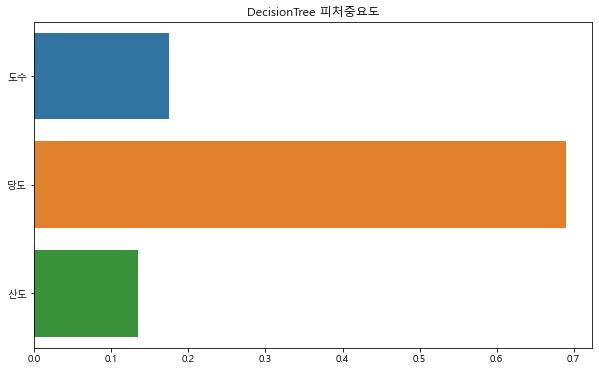

In [108]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["font.family"] = "Malgun Gothic"

fig, axes = plt.subplots(1, 1, squeeze=False)
fig.set_size_inches((10,6))

plt.title("피처중요도")
sns.barplot(x=dt_clf1.feature_importances_, y=data.columns, ax=axes[0,0])
axes[0,0].title.set_text("DecisionTree 피처중요도")

plt.show()

### 시각화

In [128]:
from sklearn.tree import export_graphviz

feature_names = wine_df.iloc[:, :-1].columns.tolist()
target_names = ["0", "1"]

export_graphviz(dt_clf1, 
                out_file="./image/wine_dtree.dot",
                class_names=target_names, 
                feature_names=feature_names, 
                impurity=True, 
                filled=True, 
                rounded=True
                )

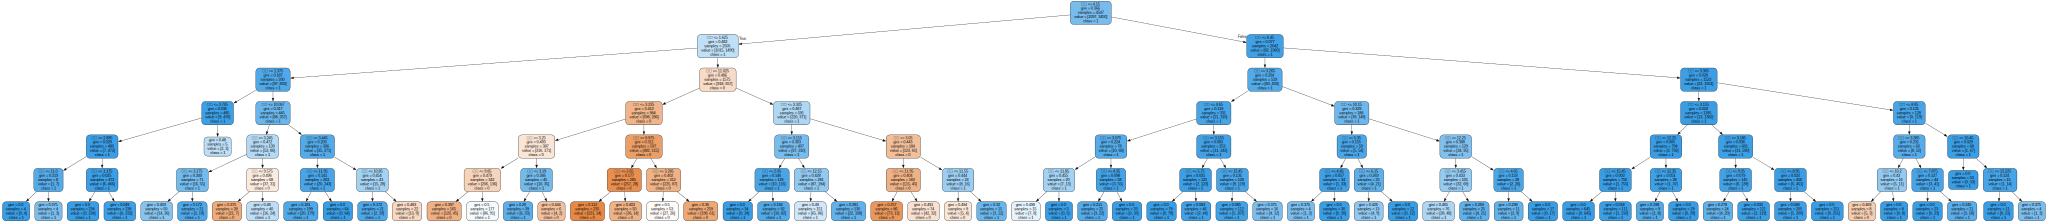

In [136]:
import graphviz

with open("./image/wine_dtree.dot", encoding='UTF-8') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)